(348, 90)
348


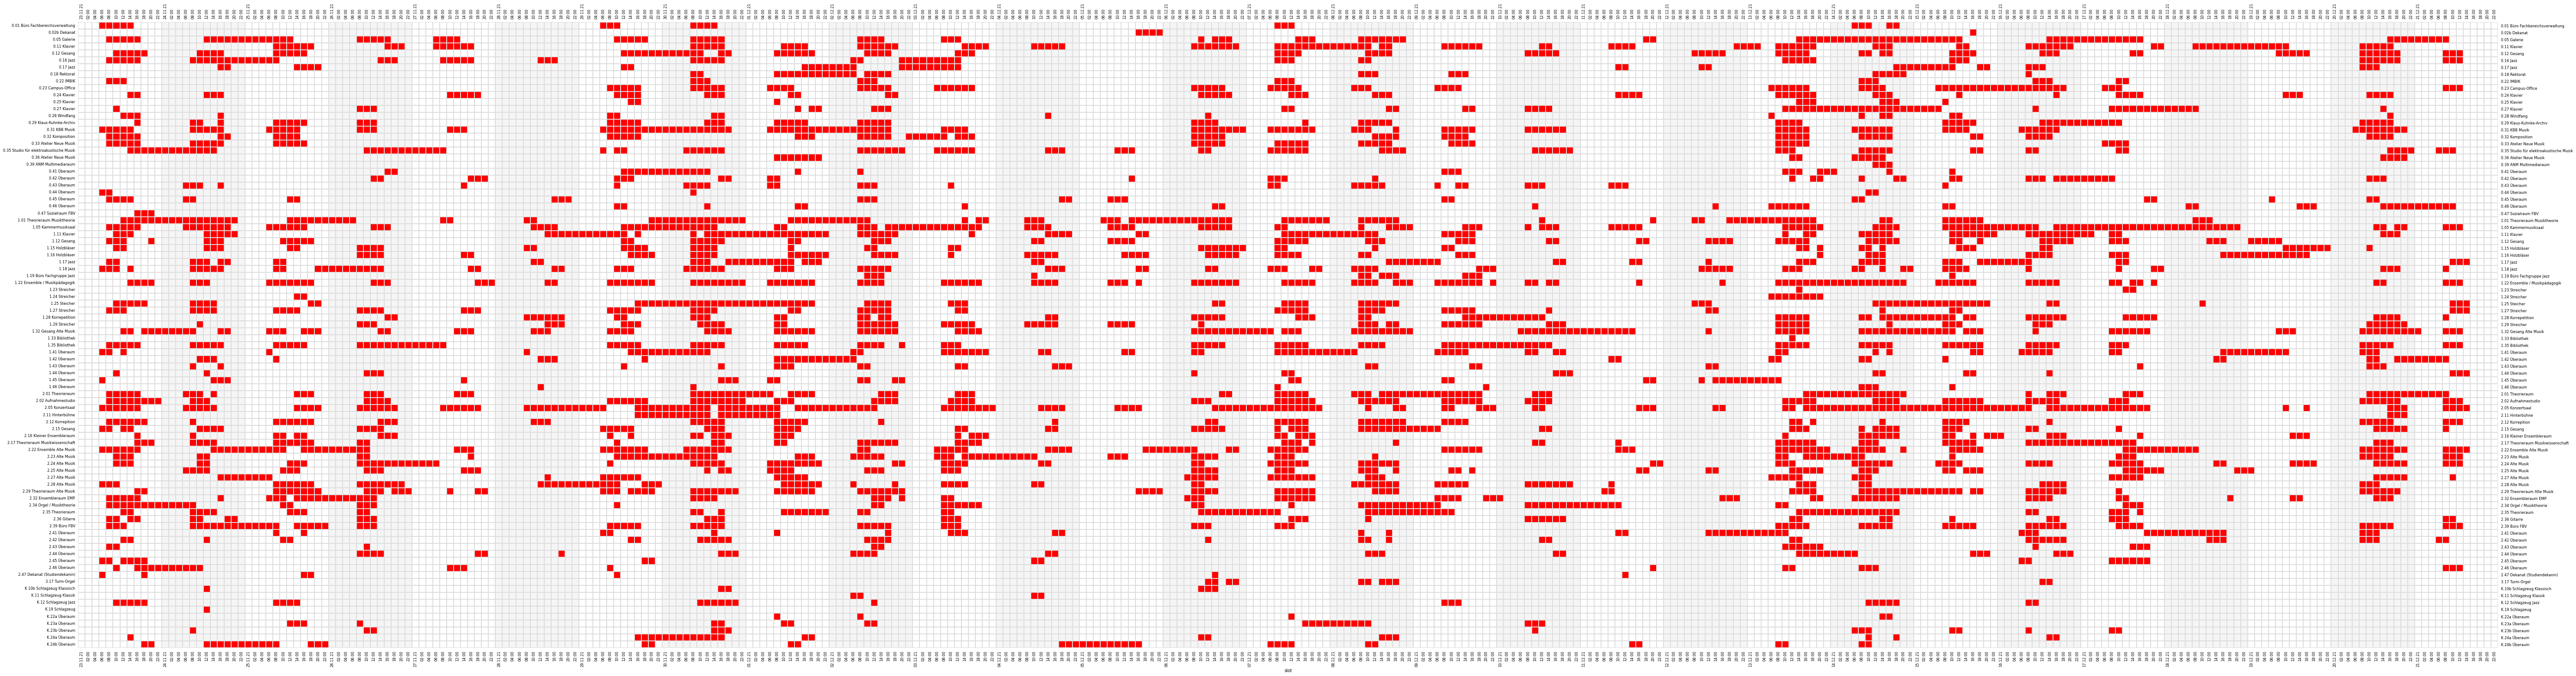

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates;

def combine_values(x):
    if x.has_checkin > 0 and x.has_reservation > 0: return 3
    if x.has_checkin > 0: return 2;
    if x.has_reservation > 0: return 1;

    if x.slot.timetuple().tm_yday % 2 == 0: return 4
    return 0;
    
    


df = pd.read_csv('data/de.csv') 
df['slot'] = pd.to_datetime(df['slot'], format='%Y-%m-%d %H:%M:%S', errors='raise')

df['value'] = df.apply(combine_values, axis = 1)
pivot = df.pivot_table(index=df['slot'],columns=df['n'],values=['value'],aggfunc='sum',fill_value=0)
# pivot = pivot.iloc[:30,:10]
print (pivot.shape)
# fig,ax=plt.subplots(figsize=(50,10))
fig,ax=plt.subplots(figsize=(100,45))
ax.set_facecolor("yellow")

pivot.columns = [col[1] for col in pivot.columns.values]

ax = sns.heatmap(pivot.T, xticklabels=1, cmap=["white", "blue", "red", "magenta", "whitesmoke"],fmt="d", linewidths=2,square=True,linecolor="gainsboro",cbar=False)
labels = [pd.to_datetime(str(tick)) for tick in pivot.index.values]
labels = [tick.hour == 0 and tick.strftime("%d.%m.%y") or tick.strftime("%H:%M") for tick in labels];
print(len(labels))
ax.set_xticklabels(labels=labels)
ax.xaxis.set_tick_params(rotation=90,labelsize='small', labelleft=True, labelright=True, bottom=False, top=False, left=False, right=False)
ax.yaxis.set_tick_params(rotation=0,labelsize='small', labelbottom=True, labeltop=True, bottom=False, top=False, left=False, right=False)
# ax.xticks(rotation=0, ha='center')

# fig.autofmt_xdate()
# plt.show()
plt.savefig('de.png',facecolor="gainsboro", dpi=150)